<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.630761,50.878630,84.910194,96.352073,114.486015,439.257673,-33.194617,472.452291
1,0.0,1.0,41.826182,91.682709,58.601903,46.576191,197.144250,445.831235,617.377660,-171.546425
2,0.0,2.0,93.042893,20.901199,75.291019,50.367851,-101.998298,147.604663,-57.847885,205.452549
3,0.0,3.0,70.850946,57.620903,76.177955,41.138938,-207.872809,47.915934,278.148361,-230.232428
4,0.0,4.0,56.104664,60.671707,46.915593,25.910565,410.321806,609.924334,475.592080,134.332255
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.835189,50.336717,42.376761,45.778651,89.638442,284.965759,89.290545,195.675214
19996,999.0,16.0,55.843384,86.057112,29.365172,22.341820,-359.962929,-156.355441,26.423491,-182.778932
19997,999.0,17.0,63.323291,51.077952,41.640605,60.362841,-99.832898,126.571791,220.319798,-93.748007
19998,999.0,18.0,71.516708,28.309450,28.765457,87.938656,161.643201,388.173471,273.143740,115.029731


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.630761,50.878630,84.910194,96.352073,114.486015,439.257673,-33.194617,472.452291
1,0.0,1.0,41.826182,91.682709,58.601903,46.576191,197.144250,445.831235,617.377660,-171.546425
2,0.0,2.0,93.042893,20.901199,75.291019,50.367851,-101.998298,147.604663,-57.847885,205.452549
3,0.0,3.0,70.850946,57.620903,76.177955,41.138938,-207.872809,47.915934,278.148361,-230.232428
4,0.0,4.0,56.104664,60.671707,46.915593,25.910565,410.321806,609.924334,475.592080,134.332255
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.835189,50.336717,42.376761,45.778651,89.638442,284.965759,89.290545,195.675214
19996,999.0,16.0,55.843384,86.057112,29.365172,22.341820,-359.962929,-156.355441,26.423491,-182.778932
19997,999.0,17.0,63.323291,51.077952,41.640605,60.362841,-99.832898,126.571791,220.319798,-93.748007
19998,999.0,18.0,71.516708,28.309450,28.765457,87.938656,161.643201,388.173471,273.143740,115.029731


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.630761  50.878630  84.910194  96.352073  114.486015   
      1.0    41.826182  91.682709  58.601903  46.576191  197.144250   
      2.0    93.042893  20.901199  75.291019  50.367851 -101.998298   
      3.0    70.850946  57.620903  76.177955  41.138938 -207.872809   
      4.0    56.104664  60.671707  46.915593  25.910565  410.321806   
...                ...        ...        ...        ...         ...   
999.0 15.0   46.835189  50.336717  42.376761  45.778651   89.638442   
      16.0   55.843384  86.057112  29.365172  22.341820 -359.962929   
      17.0   63.323291  51.077952  41.640605  60.362841  -99.832898   
      18.0   71.516708  28.309450  28.765457  87.938656  161.643201   
      19.0   45.507324  35.656766  56.899322  94.248307 -321.893852   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    439.257673  -33.194617  472.452291  
      1.0    445.831235  617.377660 -171.546425  
      2.0    147.604663  -57.847885  205.452549  
      3.0     47.915934  278.148361 -230.232428  
      4.0    609.924334  475.592080  134.332255  
...                 ...         ...         ...  
999.0 15.0   284.965759   89.290545  195.675214  
      16.0  -156.355441   26.423491 -182.778932  
      17.0   126.571791  220.319798  -93.748007  
      18.0   388.173471  273.143740  115.029731  
      19.0   -79.582132  326.340260 -405.922392  

[20000 rows x 8 columns]

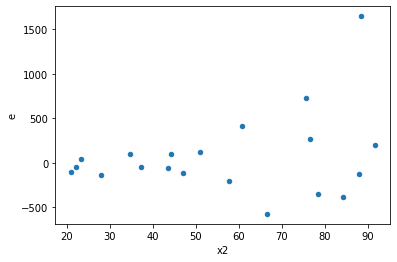

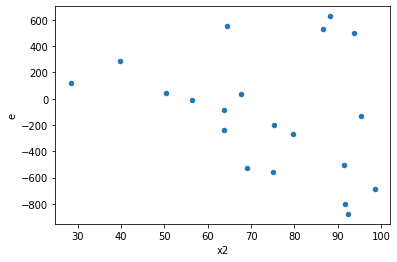

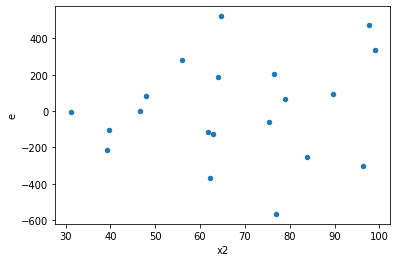

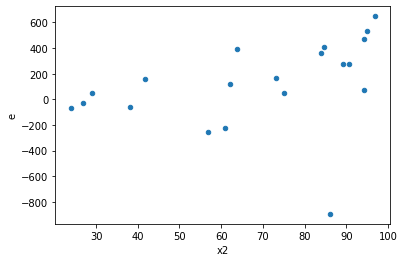

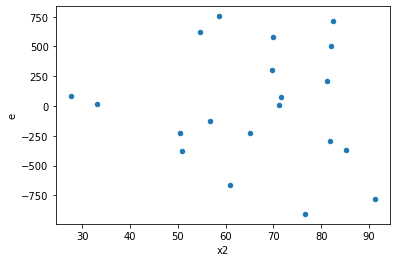

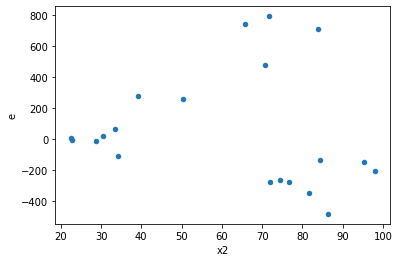

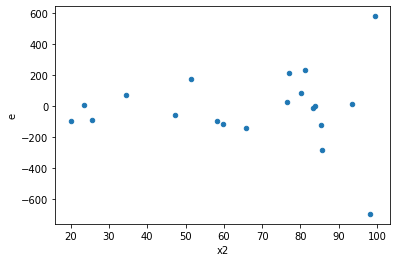

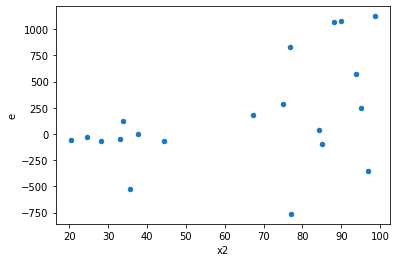

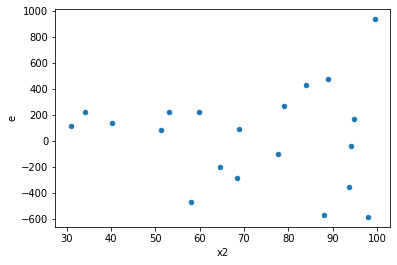

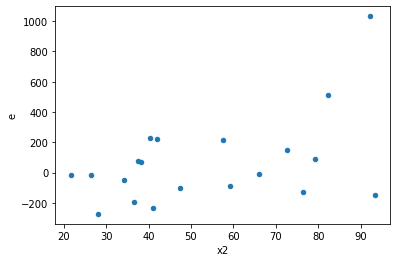

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,5.0,60665.65996151927,789219.5755692101,8666.52285164561,157843.91511384203,18.213061664502554,0.005615665621024224,0.9971921671894879,0.002807832810512112,Reject001=0 : Heteroscedasticity
2.0,10.0,2.0,604573.6159205334,204690.81163791232,60457.36159205334,102345.40581895616,1.6928526671334048,0.8556951216227289,0.5721524391886356,0.42784756081136444,Reject001=1 : Homoscedasticity
3.0,4.0,8.0,115651.50644250002,1018150.1160979011,28912.876610625004,127268.76451223764,4.40180222210987,0.0714517691652512,0.9642741154173744,0.0357258845826256,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,710718.2223175106,999452.4846094071,142143.64446350213,142778.92637277246,1.0044692952095613,0.9584720875622654,0.5207639562188673,0.4792360437811327,Reject001=1 : Homoscedasticity
9.0,5.0,7.0,139212.83136072286,217055.4539860968,27842.566272144573,31007.92199801383,1.1136876426881697,0.8634878267441493,0.5682560866279254,0.43174391337207463,Reject001=1 : Homoscedasticity
13.0,6.0,6.0,154593.06576083633,282415.9474675314,25765.51096013939,47069.32457792191,1.8268345095403171,0.4820491946983536,0.7589754026508232,0.2410245973491768,Reject001=1 : Homoscedasticity
14.0,6.0,6.0,391235.6134189116,428530.5594545671,65205.9355698186,71421.75990909452,1.0953260509945508,0.9148152283437028,0.5425923858281486,0.4574076141718514,Reject001=1 : Homoscedasticity
15.0,3.0,9.0,141349.9783889893,738309.8413982252,47116.65946299643,82034.42682202502,1.7410917445548455,0.4561093539820955,0.7719453230089522,0.22805467699104776,Reject001=1 : Homoscedasticity
16.0,10.0,2.0,893501.7546136688,407646.34926275146,89350.17546136687,203823.17463137573,2.281172628692873,0.6861800640871762,0.6569099679564119,0.3430900320435881,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,60665.65996151927,789219.5755692101,8666.52285164561,157843.91511384203,18.213061664502554,0.005615665621024224,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,1886290.5490791816,762061.2999736686,314381.7581798636,127010.21666227811,0.40399995660566673,0.2945102499044713,Reject001=1 : Homoscedasticity
2.0,10.0,2.0,604573.6159205334,204690.81163791232,60457.36159205334,102345.40581895616,1.6928526671334048,0.8556951216227289,Reject001=1 : Homoscedasticity
3.0,4.0,8.0,115651.50644250002,1018150.1160979011,28912.876610625004,127268.76451223764,4.40180222210987,0.0714517691652512,Reject001=1 : Homoscedasticity
4.0,7.0,5.0,1803512.6563851,1170903.9474582279,257644.66519787142,234180.78949164558,0.9089293167075454,0.8746526107680319,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,710718.2223175106,999452.4846094071,142143.64446350213,142778.92637277246,1.0044692952095613,0.9584720875622654,Reject001=1 : Homoscedasticity
6.0,13.0,1.0,660556.965595384,2.226279070504047e-24,50812.074276568004,2.226279070504047e-24,4.381397733118516e-29,3.5380905856961534e-178,Reject001=0 : Heteroscedasticity
7.0,8.0,4.0,1039896.2563798124,163642.44374624387,129987.03204747655,40910.61093656097,0.31472840245801403,0.15386716684324725,Reject001=1 : Homoscedasticity
8.0,11.0,1.0,1213960.98094686,4.3741226478350553e-23,110360.08917698728,4.3741226478350553e-23,3.9635004651184753e-28,4.8922725297776815e-146,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      750
Reject001=0 : Heteroscedasticity    250
Name: Result_test, dtype: int64